# **WEEK 8 - HOMEWORK 3**

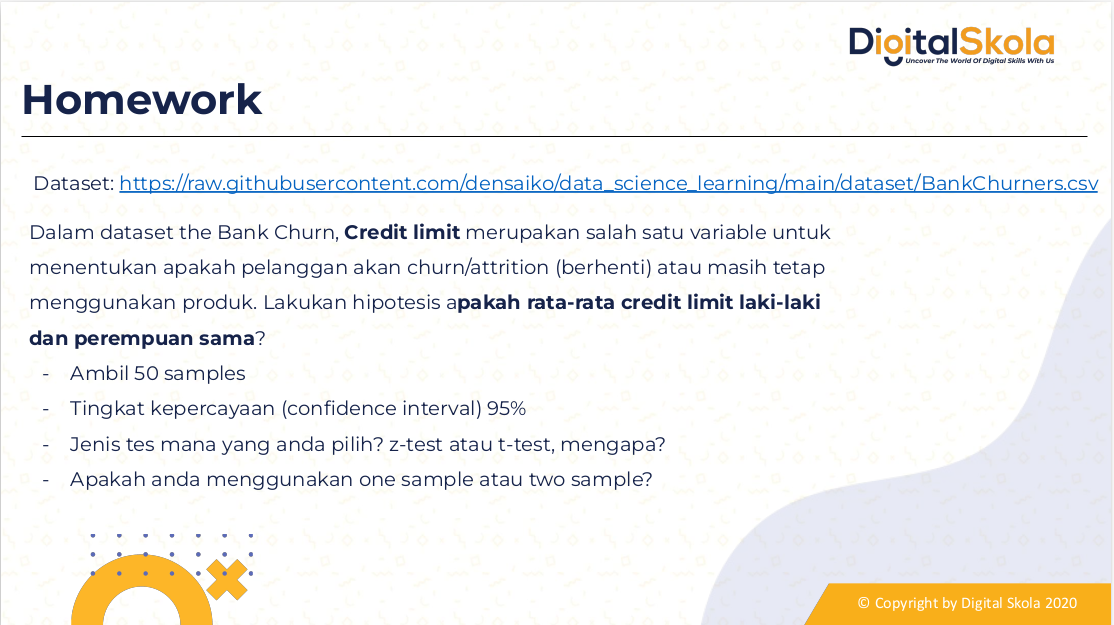

In [ ]:
# import library
import pandas as pd
import numpy as np

import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
import math

In [ ]:
# reading dataset
data  = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# Hipotesa
H0 = "Mean credit limit Male sama dengan Mean credit limit Female"
H1 = "Mean credit limit Male tidak sama dengan Mean credit limit Female"

In [ ]:
# Populasi
pop_std = data['Credit_Limit'].std()
pop_avg = data['Credit_Limit'].mean()

print("Population - STD:",round(pop_std))
print("Population - mean:",round(pop_avg))

Population - STD: 9089
Population - mean: 8632


Sample = 50
Confidence Level = 95%

* Karena sample yang digunakan sebanyak 50, maka hipotesis menggunakan z-test (sample > 30)
* Karena terdapat dua sample yang dibandingkan dalam hipotesa (Male dan Female), maka gunakkan z-test two sample

In [ ]:
# set the value
confidence_level = 0.95
alpha = 1-confidence_level

# Male
male = data[data['Gender'] == "M"]
s_male = male['Credit_Limit'].sample(n=50)

# Female
female = data[data['Gender'] == "F"]
s_female = female['Credit_Limit'].sample(n=50)

# ztest hypothesis
ztest_Score, pvalue = ztest(x1=s_male, x2=s_female, value=0, alternative='two-sided')
print("Z-score: ",round(ztest_Score,2))
print("Pvalue: ",round(pvalue,2))

# test
if alpha > pvalue:
  print("Reject the hypothesis")
  print("Because the pvalue {:.2f} < {:.2f}".format(pvalue, alpha))
  print(H1)
else:
  print("Accept the hypothesis")
  print("Because the pvalue {:.2f} > {:.2f}".format(pvalue, alpha))
  print(H0)

Z-score:  4.21
Pvalue:  0.0
Reject the hypothesis
Because the pvalue 0.00 < 0.05
Mean credit limit Male tidak sama dengan Mean credit limit Female
